In [1]:
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle

In [2]:
cole = pd.read_csv('./data/gerrit-cole.csv')
cole.drop(columns = ['Unnamed: 0'], inplace = True)

# Switch from catcher's perspective to pitcher's perspective
# Catcher's POV: (plate_x, plate_z)
# Pitcher's POV: (plate_-x, plate_z)
cole['plate_-x'] = -cole['plate_x']
# Switch HB to perspective of pitcher
# Catcher's POV: (pfx_x, pfx_z)
# Pitcher's POV: (pfx_-x, pfx_z)
cole['pfx_-x'] = -cole['pfx_x']

# HB and VB in feet should be in inches (*12)
cole['pfx_x'] = 12 * cole['pfx_x']
cole['pfx_-x'] = 12 * cole['pfx_-x']
cole['pfx_z'] = 12 * cole['pfx_z']

pd.set_option('max_columns', None)
print(cole.shape)
cole.head()

(2969, 86)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,plate_-x,pfx_-x
0,CH,2021-09-29,90.3,-1.83,5.55,"Cole, Gerrit",624512,543037,field_out,hit_into_play,4,Reese McGuire flies out to center fielder Bret...,R,L,R,TOR,NYY,X,8.0,fly_ball,1,1,2021,-14.88,8.64,-0.49,2.15,NaN,NaN,669289.0,2,6,Bot,118.83,87.48,543309,6.015335,-131.280391,-4.011456,-15.614875,29.851469,-23.248081,3.37,1.53,264.0,84.0,46.0,90.7,1571.0,6.7,632296,543037,543309,519203,650402,518934,570482,608336,458731,592450,53.75,0.014,0.017,0.0,1.0,0.0,0.0,3.0,49,3,Changeup,5,3,5,3,3,5,5,3,Standard,Standard,243.0,-0.014,-0.215,0.49,14.88
1,CH,2021-09-29,89.4,-1.78,5.57,"Cole, Gerrit",624512,543037,NaN,foul_tip,5,Reese McGuire flies out to center fielder Bret...,R,L,R,TOR,NYY,S,NaN,NaN,1,0,2021,-19.20,4.20,0.23,2.62,NaN,NaN,669289.0,2,6,Bot,NaN,NaN,543309,8.390092,-129.917469,-1.924524,-19.921778,29.608677,-28.057483,3.37,1.53,NaN,NaN,NaN,89.5,1807.0,6.6,632296,543037,543309,519203,650402,518934,570482,608336,458731,592450,53.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,2,Changeup,5,3,5,3,3,5,5,3,Standard,Standard,240.0,0.000,-0.048,-0.23,19.20
2,FF,2021-09-29,97.4,-1.86,5.71,"Cole, Gerrit",624512,543037,NaN,ball,11,Reese McGuire flies out to center fielder Bret...,R,L,R,TOR,NYY,B,NaN,NaN,0,0,2021,-15.96,16.92,-1.53,3.53,NaN,NaN,669289.0,2,6,Bot,NaN,NaN,543309,3.941160,-141.575077,-3.445982,-18.668495,39.141268,-12.832533,3.54,1.53,NaN,NaN,NaN,96.5,2428.0,6.3,632296,543037,543309,519203,650402,518934,570482,608336,458731,592450,54.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,1,4-Seam Fastball,5,3,5,3,3,5,5,3,Standard,Standard,224.0,0.000,0.036,1.53,15.96
3,SL,2021-09-29,87.5,-1.73,5.75,"Cole, Gerrit",669289,543037,single,hit_into_play,5,Santiago Espinal singles on a line drive to le...,R,R,R,TOR,NYY,X,7.0,line_drive,0,1,2021,6.36,-2.52,0.23,2.29,NaN,NaN,NaN,2,6,Bot,92.33,89.15,543309,3.614514,-127.418484,-1.742274,4.921013,28.780383,-34.245833,3.30,1.50,241.0,91.1,13.0,87.0,2539.0,6.1,632296,543037,543309,519203,650402,518934,570482,608336,458731,592450,54.36,0.911,0.866,0.9,1.0,1.0,0.0,4.0,48,2,Slider,5,3,5,3,3,5,5,3,Standard,Standard,75.0,0.007,0.139,-0.23,-6.36
4,SL,2021-09-29,87.9,-1.66,5.85,"Cole, Gerrit",669289,543037,NaN,called_strike,5,Santiago Espinal singles on a line drive to le...,R,R,R,TOR,NYY,S,NaN,NaN,0,0,2021,2.52,-0.12,0.21,2.27,NaN,NaN,NaN,2,6,Bot,NaN,NaN,543309,4.093814,-127.964480,-2.501613,1.338991,28.401825,-31.982165,3.33,1.50,NaN,NaN,NaN,87.6,2476.0,6.3,632296,543037,543309,519203,650402,518934,570482,608336,458731,592450,54.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,1,Slider,5,3,5,3,3,5,5,3,Standard,Standard,125.0,0.000,-0.018,-0.21,-2.52


In [3]:
pitches = cole[['pitch_type', 'release_speed', 'release_spin_rate', 'spin_axis', 
                'pfx_x', 'pfx_-x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                'effective_speed', 'release_extension', 'release_pos_y', 'plate_x', 
                'plate_-x', 'plate_z', 'pitch_number', 'pitch_name', 
                'bb_type', 'hit_location', 'type', 'balls', 'strikes', 'hc_x', 'hc_y', 
                'hit_distance_sc', 'launch_speed', 'launch_angle',
                'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 
                'woba_value', 'woba_denom', 'babip_value', 'iso_value', 'launch_speed_angle', 
                'if_fielding_alignment', 'of_fielding_alignment', 'game_pk']].copy()

pitches.groupby(['pitch_type']).mean()

,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_-x,pfx_z,release_pos_x,release_pos_z,effective_speed,release_extension,release_pos_y,plate_x,plate_-x,plate_z,pitch_number,hit_location,balls,strikes,hc_x,hc_y,hit_distance_sc,launch_speed,launch_angle,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,game_pk
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CH,89.838955,1719.200000,240.069048,-15.822898,15.822898,9.987363,-2.004323,5.509881,90.128266,6.686667,53.815036,-0.281496,0.281496,1.730143,3.311164,4.612903,1.040380,1.068884,134.235000,132.216250,115.930070,79.664336,4.377622,0.259830,0.275739,0.266788,1.0,0.175182,0.102190,2.818182,633514.194774
FF,97.674267,2452.342878,216.839656,-11.993738,11.993738,17.968949,-1.919936,5.678299,97.725375,6.565426,53.933824,0.010229,-0.010229,2.873495,2.954968,4.903915,0.901358,0.948535,127.360691,111.305957,199.590726,84.251111,30.327273,0.346282,0.421612,0.288942,1.0,0.166667,0.160256,3.462766,633449.982845
KC,83.430108,2799.793548,39.830108,10.456774,-10.456774,-11.990968,-1.960882,5.769312,83.193118,6.343656,54.157634,0.226968,-0.226968,1.787978,2.490323,5.144578,0.556989,0.821505,116.200156,110.715625,127.182692,85.126923,-1.221154,0.379625,0.436156,0.347778,1.0,0.244444,0.177778,3.421875,633569.036559
SI,97.664000,2374.720000,219.440000,-16.843200,16.843200,14.563200,-2.043600,5.580800,97.928000,6.620000,53.879200,-0.277200,0.277200,2.683200,2.920000,4.875000,0.920000,0.960000,140.365714,119.964286,144.500000,86.910000,12.400000,0.313571,0.417000,0.522222,1.0,0.333333,0.333333,3.285714,633481.160000
SL,88.388619,2600.116844,109.380880,5.344097,-5.344097,0.486555,-1.943551,5.694264,88.813657,6.418665,54.080046,0.847162,-0.847162,1.810030,3.095599,4.243750,0.843703,1.103187,123.868710,123.572043,129.160920,81.314535,9.459302,0.306185,0.358489,0.233989,1.0,0.146067,0.101124,3.021739,633369.168437


### Pitcher Overview

In [4]:
pitches.pitch_type.value_counts(normalize = True)

FF    0.471202
SL    0.221960
KC    0.156618
CH    0.141799
SI    0.008420
Name: pitch_type, dtype: float64

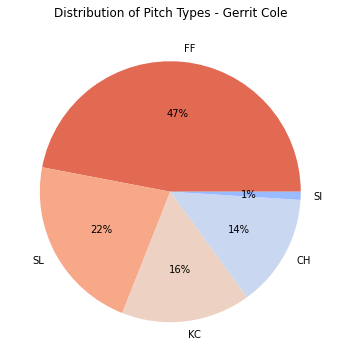

In [5]:
plt.figure(figsize = (8, 6))

dist = round(pitches.pitch_type.value_counts(normalize = True), 2)
labels = ['FF', 'SL', 'KC', 'CH', 'SI']
color = sns.color_palette('coolwarm_r')

plt.pie(dist, labels = labels, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Gerrit Cole', pad = 12);

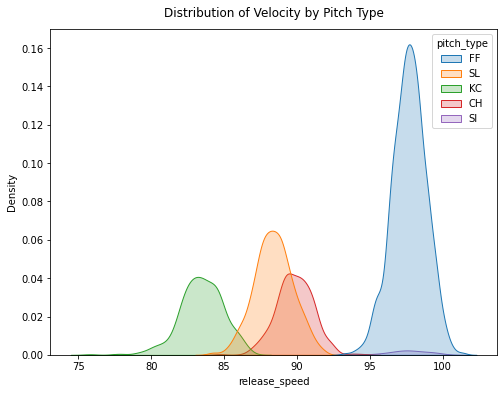

In [6]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = pitches, x = 'release_speed', shade = 'fill', 
            multiple = 'layer', hue = 'pitch_type', 
            hue_order = ['FF', 'SL', 'KC', 'CH', 'SI'], 
            palette = 'tab10')
plt.title('Distribution of Velocity by Pitch Type', pad = 12);